In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogramEqualizationFunction(img):
    #1 Calculating Histogram
    imageHistogram, bins = np.histogram(img.flatten(), 256, [0,256])
    
    #2 Getting Cumulative Sum of histogram
    ck = imageHistogram.cumsum()

    # Normalizing CDF for Transformation
    c0 = ck[0] # First element of ck to handle edge cases in normalization
    L = 256 # Grayscale max value
    MRowsNColumns = img.shape[0] * img.shape[1] # Calculate total image pixels for normalization

    #3 Applying transformation and rounding for intensity mapping
    transformation = ((L-1) * (ck - c0) / (MRowsNColumns - c0)) 
    transformation_rounded = np.round(transformation).astype(np.uint8)
    img_equalized = transformation_rounded[img].reshape(img.shape)
    return img_equalized


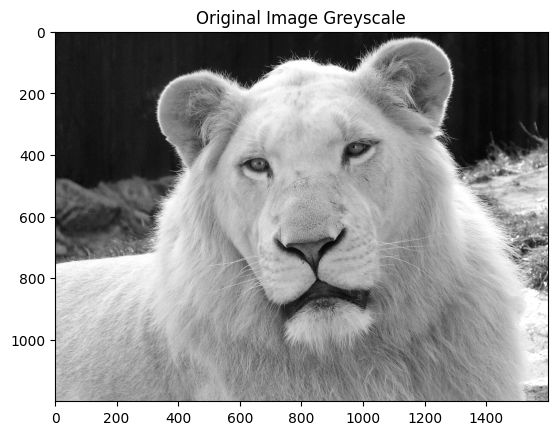

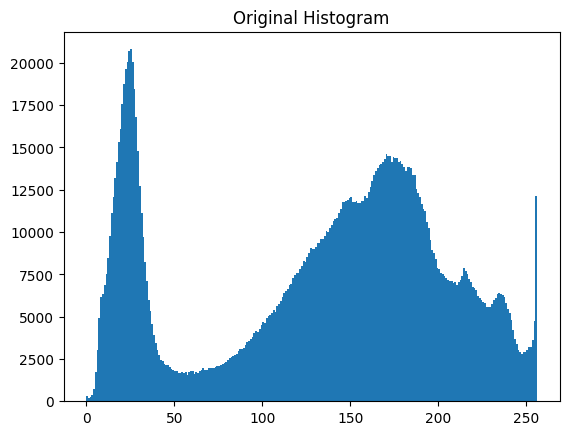

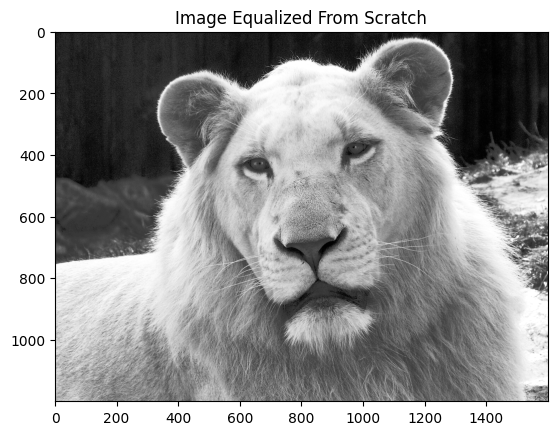

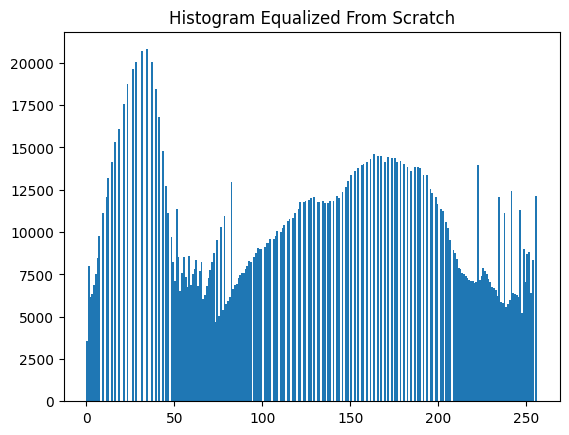

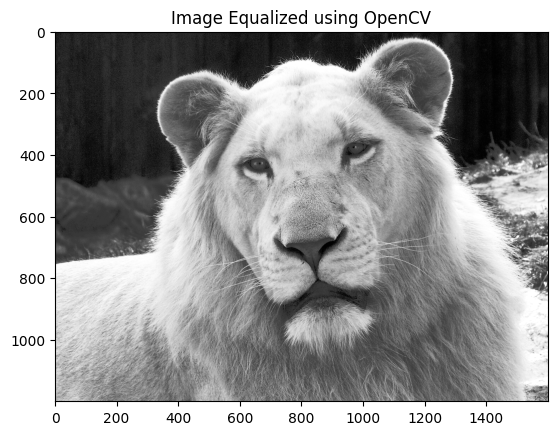

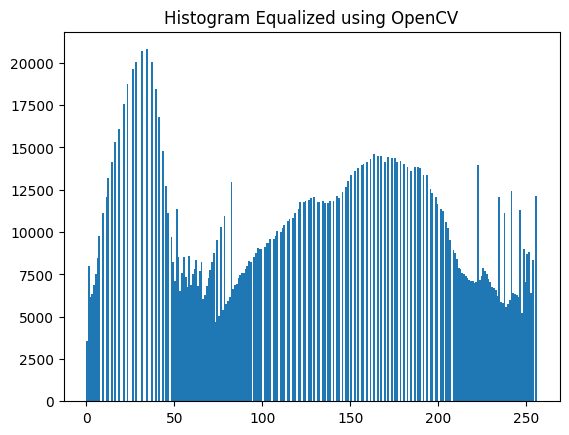

In [30]:
img = cv2.imread('./InputImages/histogram_whitelion.jpg', cv2.IMREAD_GRAYSCALE)
equalized_image = histogramEqualizationFunction(img)
opencv_image = cv2.equalizeHist(img)

plt.imshow(img, 'gray')
plt.title('Original Image Greyscale')
plt.show()
plt.hist(img.flatten(), 256, [0,256])
plt.title('Original Histogram')
plt.show()

plt.imshow(equalized_image, 'gray')
plt.title('Image Equalized From Scratch')
plt.show()
plt.hist(equalized_image.flatten(), 256, [0,256])
plt.title('Histogram Equalized From Scratch')
plt.show()

plt.imshow(opencv_image, 'gray')
plt.title('Image Equalized using OpenCV')
plt.show()
plt.hist(opencv_image.flatten(), 256, [0,256])
plt.title('Histogram Equalized using OpenCV')
plt.show()